In [ ]:
import torch
print(torch.__version__)
from torch import nn

2.6.0+cu124


In [ ]:
if torch.cuda.is_available():
  device='coda'
elif torch.backends.mps.is_available():
  device=torch.device('maps')
else:
  device='cpu'
  print('using device:',device)

using device: cpu


In [ ]:
m=0.7
c=0.3
x=torch.arange(0,1,0.02).unsqueeze(dim=1)
y=m*x+c
print(f"shape of x: {x.shape}")
print(f"shape of y: {y.shape}")
print(f"type of x: {type(x)}")
print(f"type of y: {type(y)}")




shape of x: torch.Size([50, 1])
shape of y: torch.Size([50, 1])
type of x: <class 'torch.Tensor'>
type of y: <class 'torch.Tensor'>


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
def plot_data(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test,predictions=None):
  plt.figure(figsize=(8,6))
  plt.scatter(x_train,y_train,s=8,c='b',label='training data')
  plt.scatter(x_test,y_test,s=8,c='r',label='testing data')
  if predictions is not None:
    plt.scatter(x_test,predictions,s=8,c='g',label='prediction data')
  plt.legend()
  plt.title('X vs Y')
  plt.show()


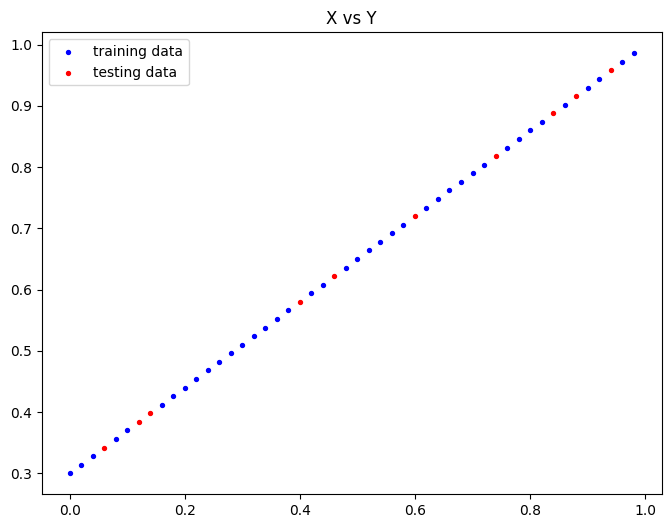

In [ ]:
plot_data()

In [ ]:
class FirstNeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
    self.bias=nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))


  def forward(self,x:torch.Tensor)-> torch.Tensor:
     return self.weights*x+self.bias

In [ ]:
torch.manual_seed(42)
model=FirstNeuralNetwork()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
with torch.inference_mode():
  y_preds=model(x_test).cpu().detach().numpy()

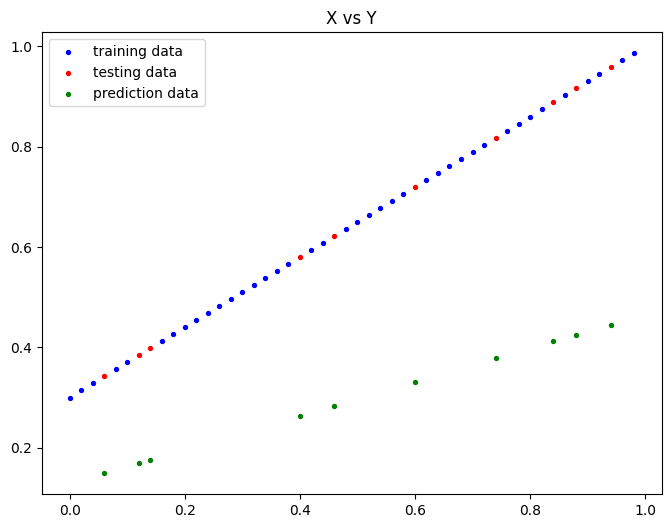

In [ ]:
plot_data(predictions=y_preds)

In [ ]:
# set up loss function
loss_fn=nn.MSELoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [ ]:
epochs=200
# cast the model to device
model.to(device)
# cast the data to device
x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)
train_loss_list=[]
test_loss_list=[]
for epoch in range(epochs):
  # # training
  model.train()
  # 1. Forward pass
  train_preds=model(x_train)
  # 2. compute training loss
  train_loss=loss_fn(y_train,train_preds)
  # 3. zero grad optimizer
  optimizer.zero_grad()
  # 4. loss backward
  train_loss.backward()
  # 5. optimizer step
  optimizer.step()
  train_loss_list.append(train_loss.cpu().detach().numpy())
  # # Testing
  model.eval()
  # compute the test predictions
  with torch.inference_mode():
   test_preds=model(x_test)
  # compute the test loss
  test_loss=loss_fn(y_test,test_preds)
  test_loss_list.append(test_loss.cpu().detach().numpy())
  if (epoch+1)%10==0:
    print(f"epoch: {epoch+1} | train loss: {train_loss:.4f} | test loss: {test_loss:.4f}")

epoch: 10 | train loss: 0.0000 | test loss: 0.0000
epoch: 20 | train loss: 0.0000 | test loss: 0.0000
epoch: 30 | train loss: 0.0000 | test loss: 0.0000
epoch: 40 | train loss: 0.0000 | test loss: 0.0000
epoch: 50 | train loss: 0.0000 | test loss: 0.0000
epoch: 60 | train loss: 0.0000 | test loss: 0.0000
epoch: 70 | train loss: 0.0000 | test loss: 0.0000
epoch: 80 | train loss: 0.0000 | test loss: 0.0000
epoch: 90 | train loss: 0.0000 | test loss: 0.0000
epoch: 100 | train loss: 0.0000 | test loss: 0.0000
epoch: 110 | train loss: 0.0000 | test loss: 0.0000
epoch: 120 | train loss: 0.0000 | test loss: 0.0000
epoch: 130 | train loss: 0.0000 | test loss: 0.0000
epoch: 140 | train loss: 0.0000 | test loss: 0.0000
epoch: 150 | train loss: 0.0000 | test loss: 0.0000
epoch: 160 | train loss: 0.0000 | test loss: 0.0000
epoch: 170 | train loss: 0.0000 | test loss: 0.0000
epoch: 180 | train loss: 0.0000 | test loss: 0.0000
epoch: 190 | train loss: 0.0000 | test loss: 0.0000
epoch: 200 | train lo

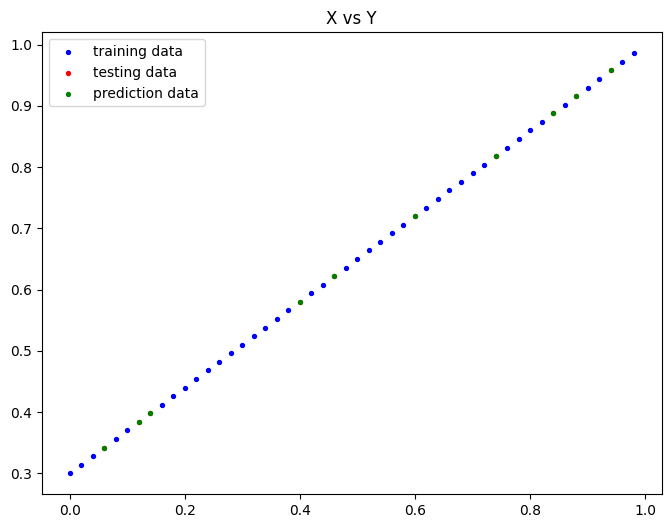

In [ ]:
with torch.inference_mode():
  y_preds=model(x_test).cpu().detach().numpy()

plot_data(predictions=y_preds)

In [ ]:
print(m,c)

0.7 0.3


In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([0.7000], requires_grad=True),
 Parameter containing:
 tensor([0.3000], requires_grad=True)]

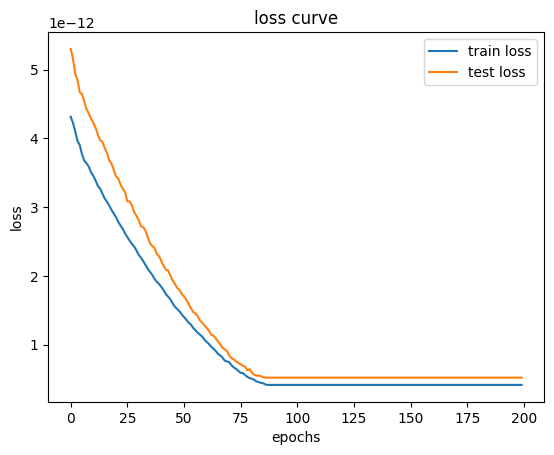

In [ ]:
# plot loss curve
plt.plot(range(epochs),train_loss_list,label='train loss')
plt.plot(range(epochs),test_loss_list,label='test loss')
plt.legend()
plt.title('loss curve')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('loss_curve.png')
plt.show()

In [ ]:
# saving and loading model
model.to('cpu')
torch.save(obj=model.state_dict(),f='model.pth')
print('model saved')


model saved
